In [1]:
#Importing the necessary modules and libraries
import numpy as np
import pandas as pd
#Matplot and Seaborn for visualisation
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import norm, skew
import statsmodels.api as sm

In [2]:
#Read the csv Files
df_test_LearnX=pd.read_csv('test.csv')
df_train_LearnX=pd.read_csv('train.csv')

In [3]:
#Code to retreive the top 5 rows of the test dataset
df_test_LearnX.head()

,ID,Day_No,Course_ID,Course_Domain,Course_Type,Short_Promotion,Public_Holiday,Long_Promotion,Competition_Metric
0,883,883,1,Development,Course,1,0,1,0.007
1,884,884,1,Development,Course,1,0,1,0.007
2,885,885,1,Development,Course,1,0,1,0.007
3,886,886,1,Development,Course,1,0,1,0.007
4,887,887,1,Development,Course,0,0,1,0.007


In [4]:
#Code to retreive the top 5 rows of the train dataset
df_train_LearnX.head()

,ID,Day_No,Course_ID,Course_Domain,Course_Type,Short_Promotion,Public_Holiday,Long_Promotion,User_Traffic,Competition_Metric,Sales
0,1,1,1,Development,Course,0,1,1,11004,0.007,81
1,2,2,1,Development,Course,0,0,1,13650,0.007,79
2,3,3,1,Development,Course,0,0,1,11655,0.007,75
3,4,4,1,Development,Course,0,0,1,12054,0.007,80
4,5,5,1,Development,Course,0,0,1,6804,0.007,41


### Data Description

1. ID--------------------------Unique Identifier for a row
2. Day_No------------------Day Number
3. Course_ID---------------Unique ID for a course
4. Course_Domain--------Course Domain (Development, Finance etc.)
5. Course_Type-----------Course/Program/Degree
6. Short_Promotion-------Whether Short Term Promotion is Live
7. Public_Holiday---------Regional/Public Holiday
8. Long_Promotion--------Whether Long Term Promotion is Live for the course
9. User_Traffic-------------Number of customers landing on the course page
10. Competition_Metric----A metric defining the strength of competition 
11. Sales(Target)------------Total Course Sales

In [5]:
#We need to predict Sales for given test data
#lets first merge the train and test data for Exploratory Data Analysis
df_train_LearnX['source'] = 'train'
df_test_LearnX['source'] = 'test'
df_test_LearnX['Sales'] = 0
data = pd.concat([df_train_LearnX, df_test_LearnX], sort = False)
#print(train.shape, test.shape, data.shape)

In [6]:
#Get the number of rows and columns of the dataset
print('Train dataset contain {} rwos and {} columns'.format(data.shape[0],data.shape[1]))

Train dataset contain 548087 rwos and 12 columns


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 548087 entries, 0 to 35999
Data columns (total 12 columns):
ID                    548087 non-null int64
Day_No                548087 non-null int64
Course_ID             548087 non-null int64
Course_Domain         548087 non-null object
Course_Type           548087 non-null object
Short_Promotion       548087 non-null int64
Public_Holiday        548087 non-null int64
Long_Promotion        548087 non-null int64
User_Traffic          512087 non-null float64
Competition_Metric    546203 non-null float64
Sales                 548087 non-null int64
source                548087 non-null object
dtypes: float64(2), int64(7), object(3)
memory usage: 54.4+ MB


The dataset have 9 numerical columns (ID, Day_No, Course_ID, Short_Promotion, Public_Holiday, Long_Promotion, User_Traffic, Competition_Metric and Sales) and 3 categorical columns(Course_Domain, Course_Type and source)

In [8]:
#Code to get the categorical columns of the dataset
categorial_features = data.select_dtypes(include=[np.object]).columns
categorial_features

Index(['Course_Domain', 'Course_Type', 'source'], dtype='object')

In [9]:
#Code to get the Numerical columns of the dataset
numerical_features = data.select_dtypes(include=[np.number]).columns
numerical_features

Index(['ID', 'Day_No', 'Course_ID', 'Short_Promotion', 'Public_Holiday',
       'Long_Promotion', 'User_Traffic', 'Competition_Metric', 'Sales'],
      dtype='object')

###  Check the data.describe()

In [10]:
data.describe()

,ID,Day_No,Course_ID,Short_Promotion,Public_Holiday,Long_Promotion,User_Traffic,Competition_Metric,Sales
count,548087.000000,548087.000000,548087.000000,548087.000000,548087.000000,548087.000000,512087.000000,546203.000000,548087.000000
mean,274044.000000,466.286898,300.395678,0.381542,0.030282,0.489802,15375.101198,0.073318,112.890649
std,158219.232832,274.352901,173.355222,0.485765,0.171361,0.499896,7727.231205,0.100069,60.467897
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,168.000000,0.000000,0.000000
25%,137022.500000,229.000000,150.000000,0.000000,0.000000,0.000000,10584.000000,0.010000,78.000000
50%,274044.000000,457.000000,300.000000,0.000000,0.000000,0.000000,13776.000000,0.035000,107.000000
75%,411065.500000,711.000000,451.000000,1.000000,0.000000,1.000000,18123.000000,0.094000,143.000000
max,548087.000000,942.000000,600.000000,1.000000,1.000000,1.000000,100002.000000,0.768000,682.000000


Text(0.5, 1.0, 'Sales Distribution')

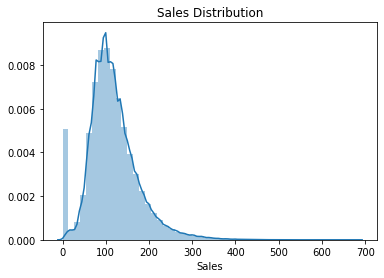

In [158]:
sns.distplot(data['Sales'])
plt.title('Sales Distribution')

Observation from the Sales distribution graph:
1. Deviate from the normal distribution.
2. Have appreciable positive skewness.
3. The graph shows peakedness.

In [61]:
print('Skewness: %f' % data['Sales'].skew())
print('Kurtsis: %f' %data['Sales'].kurt())

Skewness: 0.804940
Kurtsis: 2.398177


Skewness: 0.804940 i.e, Sales distribution is slightly right skewed.
Kurtsis: 2.398177 i.e, Sales distribution is shorter, tails are thinner than the normal distribution.

### Checking for missing values:

In [11]:
#Code to check the columns with number of missing values
data.apply(lambda x: sum(x.isnull()))

ID                        0
Day_No                    0
Course_ID                 0
Course_Domain             0
Course_Type               0
Short_Promotion           0
Public_Holiday            0
Long_Promotion            0
User_Traffic          36000
Competition_Metric     1884
Sales                     0
source                    0
dtype: int64

In [12]:
#missing values in terms of percentage
(data.isnull().sum() *100/ len(data)).sort_values(ascending=False)[:20]

User_Traffic          6.568300
Competition_Metric    0.343741
source                0.000000
Sales                 0.000000
Long_Promotion        0.000000
Public_Holiday        0.000000
Short_Promotion       0.000000
Course_Type           0.000000
Course_Domain         0.000000
Course_ID             0.000000
Day_No                0.000000
ID                    0.000000
dtype: float64

There are 1764(0.343741%) missing values in Competition_Metric and 36000 (6.568300 %) missing values in User_Traffic.

In [13]:
#Code to check the number of unique values in each columns
data.apply(lambda x : len(x.unique()))

ID                    548087
Day_No                   942
Course_ID                600
Course_Domain              4
Course_Type                3
Short_Promotion            2
Public_Holiday             2
Long_Promotion             2
User_Traffic            3476
Competition_Metric       197
Sales                    544
source                     2
dtype: int64

This tells us that there are 548087 IDs, 4 Course_Domains and 3 course_type. Another thing that should catch attention is that Short_Promotion, Public_Holiday, Long_Promotionhas have 2 unique values. Let’s explore further using the frequency of different categories in each nominal variable.

#### Lets start looking Course_domain and Course_Type distribution in Sales

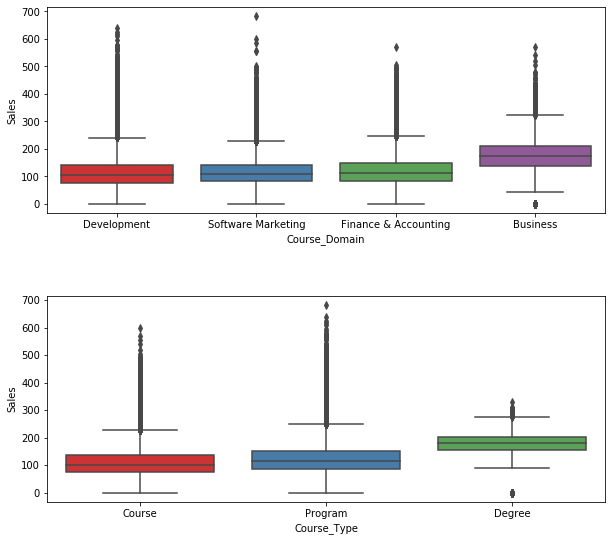

In [14]:
#Code to plot boxplot of sales vs each Course Domain
plt.figure(figsize = (10,5))
plt.subplot(211)
sns.boxplot(x='Course_Domain', y='Sales', data=data, palette="Set1")

#Code to plot boxplot of sales vs each Course Type
plt.subplot(212)
sns.boxplot(x='Course_Type', y='Sales', data=data, palette="Set1")

plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 1.5)

plt.show()

### Imputing Missing values:

In [15]:
#imputing Competition_metric column
data.groupby('Course_Domain')['Competition_Metric'].mean()

Course_Domain
Business                0.012200
Development             0.068960
Finance & Accounting    0.043276
Software Marketing      0.095883
Name: Competition_Metric, dtype: float64

Imputing the 'Competition_Metric' field with the mean Competition_Metric value of each course_domain

In [16]:
def impute_Competition_metric(cols):
    Competition_Metric=cols[0]
    course_domain=cols[1]
    
    if pd.isnull(Competition_Metric):
        if course_domain=='Business':
            return (0.012200) #replacing Competition_metric with the mean Competition_metric of course_domain 'Business'
        elif course_domain=='Development':
            return (0.068994)  #replacing Competition_metric with the mean Competition_metric of course_domain 'Development'
        elif course_domain=='Finance & Accounting':
            ##replacing Competition_metric with the mean Competition_metric of course_domain 'Finance & Accounting'
            return 0.043276
        else:
            return (0.095883) #replacing Competition_metric with the mean Competition_metric of course_domain 'Program'
    else:
        return Competition_Metric # if the Competition_Metric is not null then return the original Competition_Metric value
        

In [17]:
data['Competition_Metric']=data[['Competition_Metric','Course_Domain']].apply(impute_Competition_metric,axis=1)

In [18]:
data.apply(lambda x: sum(x.isnull()))

ID                        0
Day_No                    0
Course_ID                 0
Course_Domain             0
Course_Type               0
Short_Promotion           0
Public_Holiday            0
Long_Promotion            0
User_Traffic          36000
Competition_Metric        0
Sales                     0
source                    0
dtype: int64

This confirms that the 'Competition_Metric' column has no missing values now.

In [19]:
#Imputing User Traffic column with mode(frequesntly user traffic number) user_traffic value of each course_Domain
cols=list(data.Course_Domain.unique())
cols
mode={}
for domains in cols:
    mode[domains] =data.User_Traffic[data.Course_Domain==domains].mode()
pd.DataFrame(mode)

,Development,Software Marketing,Finance & Accounting,Business
0,13671.0,10647.0,15372.0,51618.0
1,NaN,10857.0,NaN,NaN


In [20]:
def impute_User_Traffic(cols):
    User_Traffic=cols[0]
    course_domain=cols[1]
    
    if pd.isnull(User_Traffic):
        if course_domain=='Business':
            return (51618.0) #replacing Competition_metric with the mean Competition_metric of course_domain 'Business'
        elif course_domain=='Development':
            return (13671.0)  #replacing Competition_metric with the mean Competition_metric of course_domain 'Development'
        elif course_domain=='Finance & Accounting':
            ##replacing Competition_metric with the mean Competition_metric of course_domain 'Finance & Accounting'
            return 15372.0
        else:
            return (10857.0) #replacing Competition_metric with the mean Competition_metric of course_domain 'Program'
    else:
        return User_Traffic # if the Competition_Metric is not null then return the original Competition_Metric value
        

In [21]:
data['User_Traffic']=data[['User_Traffic','Course_Domain']].apply(impute_User_Traffic,axis=1)

In [22]:
data.apply(lambda x: sum(x.isnull()))

ID                    0
Day_No                0
Course_ID             0
Course_Domain         0
Course_Type           0
Short_Promotion       0
Public_Holiday        0
Long_Promotion        0
User_Traffic          0
Competition_Metric    0
Sales                 0
source                0
dtype: int64

This confirms that the columns has no missing values now.

## Exploratory Data Analysis

### Univariate Analysis

In [23]:
data.head()

,ID,Day_No,Course_ID,Course_Domain,Course_Type,Short_Promotion,Public_Holiday,Long_Promotion,User_Traffic,Competition_Metric,Sales,source
0,1,1,1,Development,Course,0,1,1,11004.0,0.007,81,train
1,2,2,1,Development,Course,0,0,1,13650.0,0.007,79,train
2,3,3,1,Development,Course,0,0,1,11655.0,0.007,75,train
3,4,4,1,Development,Course,0,0,1,12054.0,0.007,80,train
4,5,5,1,Development,Course,0,0,1,6804.0,0.007,41,train


Text(0.5, 1.0, 'Sales Distribution')

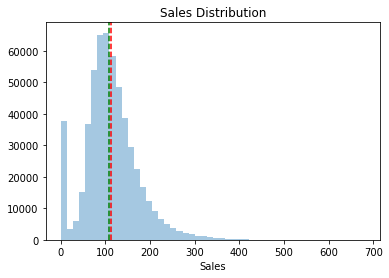

In [159]:
#Analysis of Sales:
sns.distplot(data.Sales,kde=False)
plt.axvline(x=data.Sales.mean(),color='r',linestyle='--')
plt.axvline(x=data.Sales.median(),color='g',linestyle='--')
plt.title('Sales Distribution')

- The most of the sales of the LearnX in this dataset are in the age range of 95-120. 
- In this case we are measuring Sales. We can safely say based on visual observation that most of the sales present on the data are less than 200.
- There are a very few sales that are more than 200. Once we pass the 300 point the number of observations drops further.
- From the above figure we can see the the mean is represented by the red line. The median is represented by the green line.
- We can see from the above figure that the mode and the mean are very close to each other and that the median is lower than both.

### Sales Based on 'Course_type'

Text(0.5, 1.0, 'Sales Distribution of each Course Type')

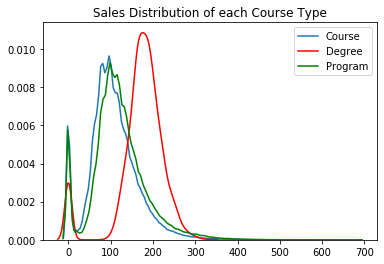

In [160]:
sns.kdeplot(data.Sales[data.Course_Type=='Course'],label='Course')
sns.kdeplot(data.Sales[data.Course_Type=='Degree'],label='Degree',color='r')
sns.kdeplot(data.Sales[data.Course_Type=='Program'],label='Program',color='g')
plt.title('Sales Distribution of each Course Type')

Sales of Course_Type 'Degree' is more compared to 'Course' and 'Program' course_types.

### Sales Based on Course_Domain

Text(0.5, 1.0, 'Average Sales plot of each Course Domain')

<Figure size 576x360 with 0 Axes>

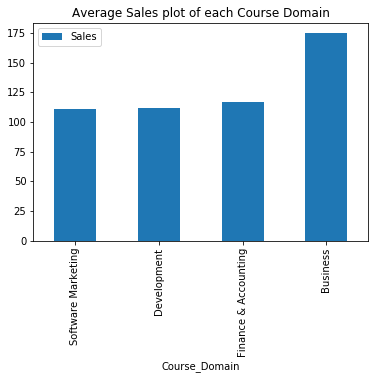

In [161]:
plt.figure(figsize=(8,5))
data.groupby('Course_Domain')['Sales'].mean().reset_index().sort_values(['Sales'],
                    ascending=True).plot(x='Course_Domain',y='Sales',kind='bar')
plt.title('Average Sales plot of each Course Domain')

Based on the above graph sales of 'Business' domain is more than the other three domains.

In [61]:
data.groupby('Course_Type')['Sales'].mean()

Course_Type
Course     105.913559
Degree     172.337580
Program    119.879297
Name: Sales, dtype: float64

Text(0.5, 1.0, 'Average Sales plot of each Course Type')

<Figure size 576x360 with 0 Axes>

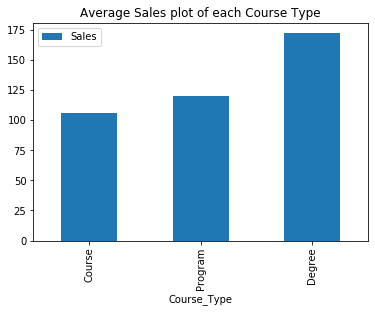

In [162]:
plt.figure(figsize=(8,5))
data.groupby('Course_Type')['Sales'].mean().reset_index().sort_values(['Sales'],
                    ascending=True).plot(x='Course_Type',y='Sales',kind='bar')
plt.title('Average Sales plot of each Course Type')

From the above visulisation, the average sales of 'Degree' course is higher than the other two courses.

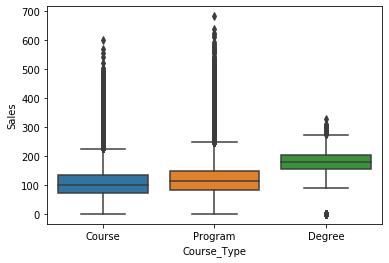

In [63]:
sns.boxplot(x=data.Course_Type, y=data.Sales)

###  Day wise sales

In [64]:
data.groupby('Day_No')['Sales'].sum().sort_values(ascending=False)

Day_No
350    152273
357    140128
546    129645
351    126690
336    125989
        ...  
912         0
911         0
910         0
909         0
942         0
Name: Sales, Length: 942, dtype: int64

Text(0.5, 1.0, 'Top 10 sales by days')

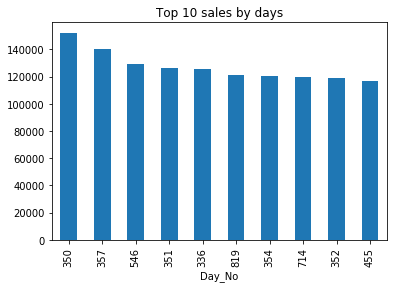

In [66]:
df_train_LearnX.groupby('Day_No')['Sales'].sum().sort_values(ascending=False).nlargest(10).plot(kind='bar')
plt.title('Top 10 sales by days')

minimum sale is 8285 on day 366 and maximum sale is 152273 on day 350

### Sales based on promotions

In [25]:
num_features=df_train_LearnX.select_dtypes(include='number').columns
cols=[i for i in num_features if len(df_train_LearnX[i].value_counts().index)<10]
cols

['Short_Promotion', 'Public_Holiday', 'Long_Promotion']

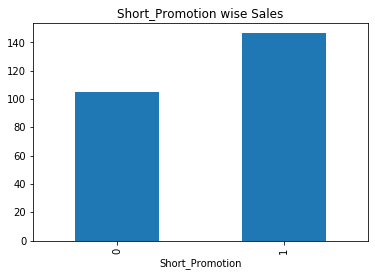

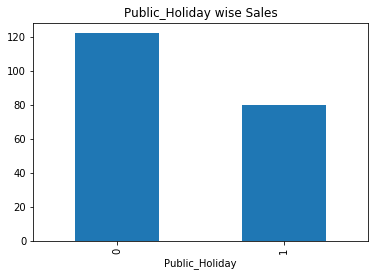

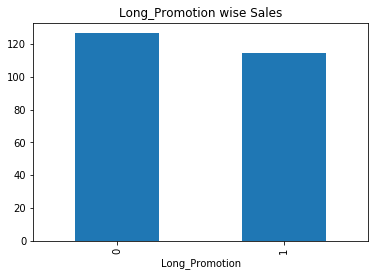

In [26]:
for features in cols:
    df_train_LearnX.groupby(features)['Sales'].mean().plot(kind='bar')
    plt.title(features+' wise Sales')
    plt.show()

In [27]:
df_train_LearnX.groupby(['Public_Holiday','Short_Promotion'])['Sales'].mean()

Public_Holiday  Short_Promotion
0               0                  106.393908
                1                  147.661997
1               0                   70.597255
                1                   99.757859
Name: Sales, dtype: float64

Inferences:
1. Average Sales is high when there is a short promotion of the course.
2. Average Sales is high when there is no Long promotion of the course.
3. Average Sales in public holidays is high compared to other days.

In [64]:
df_promotion=pd.DataFrame(data.groupby(['Course_Domain','Short_Promotion'])['Sales'].mean())
df_promotion

Sales
Course_Domain        Short_Promotion            
Business             0                160.360137
                     1                197.903889
Development          0                 96.852832
                     1                136.995274
Finance & Accounting 0                103.548405
                     1                137.375135
Software Marketing   0                 97.042278
                     1                132.968251

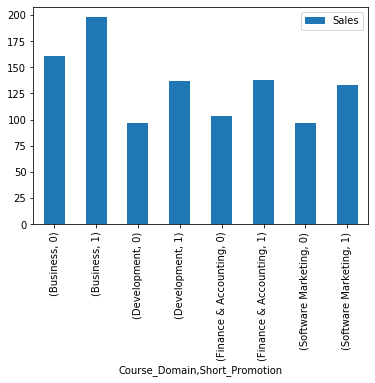

In [65]:
df_promotion.plot(kind='bar')

From the above graph, it can clearly interpreted that average sales is higher when a short promotion of the course is done.

### Assumption 1: Checking for multicolinearity. There should not be any multicolinearity between the independent variables

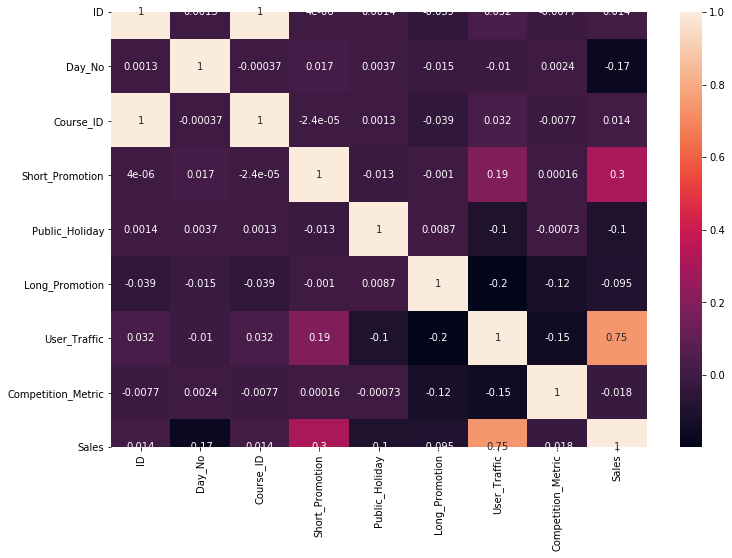

In [26]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(),annot=True)

In [32]:
data_dummy=pd.get_dummies(data,columns=['Course_Domain','Course_Type','source'], drop_first=True)
data_dummy

,ID,Day_No,Course_ID,Short_Promotion,Public_Holiday,Long_Promotion,User_Traffic,Competition_Metric,Sales,Course_Domain_Development,Course_Domain_Finance & Accounting,Course_Domain_Software Marketing,Course_Type_Degree,Course_Type_Program,source_train
0,1,1,1,0,1,1,11004.0,0.007,81,1,0,0,0,0,1
1,2,2,1,0,0,1,13650.0,0.007,79,1,0,0,0,0,1
2,3,3,1,0,0,1,11655.0,0.007,75,1,0,0,0,0,1
3,4,4,1,0,0,1,12054.0,0.007,80,1,0,0,0,0,1
4,5,5,1,0,0,1,6804.0,0.007,41,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35995,548083,938,600,1,0,1,10857.0,0.070,0,0,0,1,0,1,0
35996,548084,939,600,1,0,1,10857.0,0.070,0,0,0,1,0,1,0
35997,548085,940,600,1,0,1,10857.0,0.070,0,0,0,1,0,1,0
35998,548086,941,600,1,0,1,10857.0,0.070,0,0,0,1,0,1,0


In [42]:
X=data_dummy.drop(['Sales','ID','Course_ID'],axis=1)
y=data_dummy['Sales']
import statsmodels.api as sm
model=sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Sales   R-squared (uncentered):                   0.961
Model:                            OLS   Adj. R-squared (uncentered):              0.961
Method:                 Least Squares   F-statistic:                          1.135e+06
Date:                Sun, 05 Apr 2020   Prob (F-statistic):                        0.00
Time:                        20:03:07   Log-Likelihood:                     -2.5461e+06
No. Observations:              548087   AIC:                                  5.092e+06
Df Residuals:                  548075   BIC:                                  5.092e+06
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Day_No                                -0.0026      0.000    -19.086      0.000      -0.003      -0.002
Short_Promotion                       19.4107      0.072    270.301      0.000      19.270      19.551
Public_Holiday                       -12.6288      0.200    -63.140      0.000     -13.021     -12.237
Long_Promotion                         3.3905      0.071     47.941      0.000       3.252       3.529
User_Traffic                           0.0060   5.08e-06   1178.333      0.000       0.006       0.006
Competition_Metric                    31.4589      0.356     88.422      0.000      30.762      32.156
Course_Domain_Development            -85.9171      0.188   -457.157      0.000     -86.285     -85.549
Course_Domain_Finance & Accounting   -88.0470      0.203   -434.111      0.000     -88.445     -87.649
Course_Domain_Software Marketing     -67.6212      0.194   -348.395      0.000     -68.002     -67.241
Course_Type_Degree                  -267.2316      0.658   -406.377      0.000    -268.521    -265.943
Course_Type_Program                    6.2063      0.071     87.734      0.000       6.068       6.345
source_train                          96.3543      0.147    657.140      0.000      96.067      96.642
==============================================================================
Omnibus:                   152650.589   Durbin-Watson:                   0.432
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          6078012.146
Skew:                          -0.634   Prob(JB):                         0.00
Kurtosis:                      19.265   Cond. No.                     3.35e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.35e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [43]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['Vif']=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif

,Vif,features
0,4.538270,Day_No
1,1.699363,Short_Promotion
2,1.046291,Public_Holiday
3,2.115920,Long_Promotion
4,6.459289,User_Traffic
5,1.679294,Competition_Metric
6,15.738854,Course_Domain_Development
7,5.351186,Course_Domain_Finance & Accounting
8,10.569979,Course_Domain_Software Marketing
9,1.283816,Course_Type_Degree


VIF (Variance Inflation Factor) is a measure of colinearity among predictor variables within a multiple regression. We choose 15 as the VIF cutoff. Hence, we remove 'source_train' feature based on VIF.

### Feature Scaling

In [54]:
feature_scale=[feature for feature in data_dummy.columns if feature not in ["ID","Day_No","Sales","source_train"]]

#Feature scaling is a technique to standardize the independent features present in the data in a fixed range.
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(data_dummy[feature_scale])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [55]:
scaler.transform(data_dummy[feature_scale])

array([[-1.72706624, -0.78544489,  5.65890954, ..., -0.69366858,
        -0.05873046, -0.9670179 ],
       [-1.72706624, -0.78544489, -0.17671249, ..., -0.69366858,
        -0.05873046, -0.9670179 ],
       [-1.72706624, -0.78544489, -0.17671249, ..., -0.69366858,
        -0.05873046, -0.9670179 ],
       ...,
       [ 1.7282698 ,  1.2731638 , -0.17671249, ...,  1.44161062,
        -0.05873046,  1.03410702],
       [ 1.7282698 ,  1.2731638 , -0.17671249, ...,  1.44161062,
        -0.05873046,  1.03410702],
       [ 1.7282698 ,  1.2731638 , -0.17671249, ...,  1.44161062,
        -0.05873046,  1.03410702]])

In [57]:
df=pd.concat([data_dummy[["ID","Day_No","Sales",'source_train']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(data_dummy[feature_scale]), columns=feature_scale)],
                    axis=1)
df

,ID,Day_No,Sales,source_train,Course_ID,Short_Promotion,Public_Holiday,Long_Promotion,User_Traffic,Competition_Metric,Course_Domain_Development,Course_Domain_Finance & Accounting,Course_Domain_Software Marketing,Course_Type_Degree,Course_Type_Program
0,1,1,81,1,-1.727066,-0.785445,5.658910,1.020609,-0.560865,-0.66415,0.968630,-0.421096,-0.693669,-0.05873,-0.967018
1,2,2,79,1,-1.727066,-0.785445,-0.176712,1.020609,-0.210483,-0.66415,0.968630,-0.421096,-0.693669,-0.05873,-0.967018
2,3,3,75,1,-1.727066,-0.785445,-0.176712,1.020609,-0.474660,-0.66415,0.968630,-0.421096,-0.693669,-0.05873,-0.967018
3,4,4,80,1,-1.727066,-0.785445,-0.176712,1.020609,-0.421825,-0.66415,0.968630,-0.421096,-0.693669,-0.05873,-0.967018
4,5,5,41,1,-1.727066,-0.785445,-0.176712,1.020609,-1.117027,-0.66415,0.968630,-0.421096,-0.693669,-0.05873,-0.967018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
548082,548083,938,0,0,1.728270,1.273164,-0.176712,1.020609,-0.580331,-0.03353,-1.032386,-0.421096,1.441611,-0.05873,1.034107
548083,548084,939,0,0,1.728270,1.273164,-0.176712,1.020609,-0.580331,-0.03353,-1.032386,-0.421096,1.441611,-0.05873,1.034107
548084,548085,940,0,0,1.728270,1.273164,-0.176712,1.020609,-0.580331,-0.03353,-1.032386,-0.421096,1.441611,-0.05873,1.034107
548085,548086,941,0,0,1.728270,1.273164,-0.176712,1.020609,-0.580331,-0.03353,-1.032386,-0.421096,1.441611,-0.05873,1.034107


### Feature selection

In [74]:
X=data_dummy.drop(['Sales','ID','Course_ID','source_train'],axis=1)
y=data_dummy['Sales']

In [82]:
from sklearn.feature_selection import RFE
from sklearn.model_selection import  GridSearchCV, KFold
from sklearn.linear_model import LinearRegression
params={'n_features_to_select': list(range(1,12))}
kf=KFold(n_splits=3,random_state=3)

lr=LinearRegression()
rfe=RFE(lr)
gsearch=GridSearchCV(rfe, param_grid=params,cv=kf,scoring='r2')

In [83]:
gsearch.fit(X,y)

GridSearchCV(cv=KFold(n_splits=3, random_state=3, shuffle=False),
             error_score='raise-deprecating',
             estimator=RFE(estimator=LinearRegression(copy_X=True,
                                                      fit_intercept=True,
                                                      n_jobs=None,
                                                      normalize=False),
                           n_features_to_select=None, step=1, verbose=0),
             iid='warn', n_jobs=None,
             param_grid={'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                                                  11]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='r2', verbose=0)

In [77]:
gsearch.best_params_

{'n_features_to_select': 11}

In [84]:
gs=pd.DataFrame(gsearch.cv_results_)
gs

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,1.745238,0.227245,0.039028,0.004246,1,{'n_features_to_select': 1},-0.029430,-0.092397,-0.154838,-0.092221,0.051198,11
1,1.317270,0.020053,0.036359,0.001701,2,{'n_features_to_select': 2},-0.031277,-0.088068,-0.153826,-0.091057,0.050075,10
2,1.411671,0.080499,0.038694,0.001248,3,{'n_features_to_select': 3},-0.016372,-0.088154,-0.148243,-0.084256,0.053907,9
3,1.251523,0.015597,0.040030,0.001412,4,{'n_features_to_select': 4},0.128455,0.020824,-0.100196,0.016362,0.093400,8
4,1.140143,0.028214,0.042364,0.002626,5,{'n_features_to_select': 5},0.144622,0.034008,-0.100340,0.026097,0.100162,6
5,1.041073,0.018422,0.042697,0.001248,6,{'n_features_to_select': 6},0.142291,0.058718,-0.105016,0.031998,0.102715,5
6,0.955345,0.007592,0.043365,0.001248,7,{'n_features_to_select': 7},0.173169,0.059470,-0.105732,0.042302,0.114506,4
7,0.817581,0.024362,0.045033,0.002946,8,{'n_features_to_select': 8},0.172120,0.073736,-0.104778,0.047026,0.114610,3
8,0.689490,0.019456,0.049369,0.000472,9,{'n_features_to_select': 9},0.173858,0.073616,-0.173090,0.024795,0.145787,7
9,0.526040,0.022560,0.051703,0.001701,10,{'n_features_to_select': 10},0.079590,0.013261,0.245707,0.112852,0.097767,2


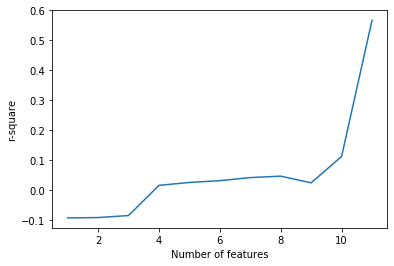

In [85]:
plt.plot(gs['param_n_features_to_select'],gs['mean_test_score'])
plt.xlabel('Number of features')
plt.ylabel('r-square')
plt.show()

As the r-squared value is more when we select all the 11 features, hence, we will choose 11 as the optional number to keep.

In [93]:
train = data_dummy.loc[data_dummy['source_train']==1]
test = data_dummy.loc[data_dummy['source_train']==0]

test.drop(['source_train'],axis=1,inplace=True)
train.drop(['source_train'],axis=1,inplace=True)


,ID,Day_No,Course_ID,Short_Promotion,Public_Holiday,Long_Promotion,User_Traffic,Competition_Metric,Sales,Course_Domain_Development,Course_Domain_Finance & Accounting,Course_Domain_Software Marketing,Course_Type_Degree,Course_Type_Program
0,1,1,1,0,1,1,11004.0,0.007,81,1,0,0,0,0
1,2,2,1,0,0,1,13650.0,0.007,79,1,0,0,0,0
2,3,3,1,0,0,1,11655.0,0.007,75,1,0,0,0,0
3,4,4,1,0,0,1,12054.0,0.007,80,1,0,0,0,0
4,5,5,1,0,0,1,6804.0,0.007,41,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512082,548023,878,600,0,0,1,8904.0,0.070,114,0,0,1,0,1
512083,548024,879,600,0,0,1,10542.0,0.070,145,0,0,1,0,1
512084,548025,880,600,0,0,1,13671.0,0.070,167,0,0,1,0,1
512085,548026,881,600,0,0,1,8904.0,0.070,107,0,0,1,0,1


### Feature Selection using RFE selection method

In [94]:
X=train.drop(['Sales','ID','Course_ID'],axis=1)
y=train['Sales']

In [97]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
#Splitting the feature and target into 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=3)

In [105]:
no_of_cols=X.shape[1]
score_list=[]
rmse_list=[]

for n in range(12):
    model=LinearRegression()
    rfe=RFE(model,n_features_to_select=n+1)
    rfe.fit(X_train,y_train)
    y_test_pred=rfe.predict(X_test)
    score=r2_score(y_test,y_test_pred)
    rmse=np.sqrt(mean_squared_error(y_test,y_test_pred))
    score_list.append(score)
    rmse_list.append(rmse)
no_of_cols

11

In [106]:
score_list

[0.000695200107391547,
 0.0033340719090776405,
 0.014125783618703536,
 0.1480731051912264,
 0.16464907413669294,
 0.18659550401831337,
 0.18759215371944604,
 0.1991117756035935,
 0.1991178385155533,
 0.2019936928553432,
 0.8308039498687124,
 0.8308039498687124]

Text(0.5, 1.0, 'r2_square plot')

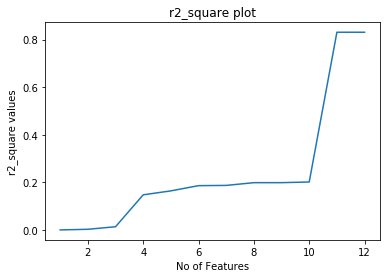

In [108]:
plt.plot(range(1,13),score_list)
plt.xlabel('No of Features')
plt.ylabel('r2_square values')
plt.title('r2_square plot')

From the above rfe rankings, r2_score plot, the result of r2 shows that we are getting values very close to maximum no of features=11. Hence, we will choose 11 as the optional number to keep.

### Building model

#### Building Linear Regression Model

In [113]:
X=train.drop(['Sales','ID','Course_ID'],axis=1)
y=train['Sales']

In [134]:
lr.fit(X_train,y_train)
y_train_pred=lr.predict(X_train)
y_test_pred=lr.predict(X_test)

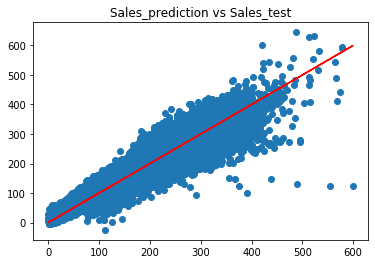

In [116]:
plt.scatter(y_test, y_test_pred)
plt.plot(y_test, y_test, 'r')
plt.title('Sales_prediction vs Sales_test')
plt.show()


In [124]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
df

,Actual,Predicted
394852,124,152.094044
215040,69,88.876401
33871,180,147.527019
228144,41,42.054048
154737,152,184.579021
...,...,...
395782,77,83.145874
327191,162,161.079033
56611,61,65.602748
243042,74,78.470015


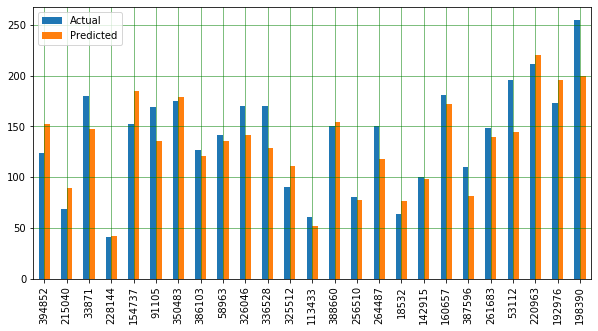

In [125]:
#Note: As the number of records is huge, for representation purpose I’m taking just 25 records.

df1 = df.head(25)
df1.plot(kind='bar',figsize=(10,5))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.xticks(ticks=None)
plt.show()

Though our model is not very precise, the predicted percentages are close to the actual ones.

In [128]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print('Mean Absolute Error:', mean_absolute_error(y_test, y_test_pred))  
print('Mean Squared Error:',mean_squared_error(y_test, y_test_pred))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error: 16.574449488385547
Mean Squared Error: 499.55188482635134
Root Mean Squared Error: 22.35065736899815


We can see that the value of root mean squared error is 22.35, which is more than 18% of the mean value of the percentages of all the temperature i.e. 120.82. This means that our algorithm was not very accurate but can still make reasonably good predictions.

In [135]:
print('r squared test',r2_score(y_test,y_test_pred))
print('r squared train',r2_score(y_train,y_train_pred))

r squared test 0.8308039498687124
r squared train 0.8311709875911181


r2 Square of both test and train are alomost same. Hence, the model is a good model to predict the sales based on the selected features.

In [147]:
print('Intercept value:',lr.intercept_)

Intercept value: -72.73192656298085


In [146]:
pd.DataFrame(lr.coef_, index=X.columns,columns=['Coefficients'])

,Coefficients
Day_No,0.008589
Short_Promotion,19.881259
Public_Holiday,-9.432220
Long_Promotion,6.901316
User_Traffic,0.006692
Competition_Metric,43.089108
Course_Domain_Development,65.230779
Course_Domain_Finance & Accounting,63.216479
Course_Domain_Software Marketing,85.824394
Course_Type_Degree,-141.810057


Since, we got a good R2 square (0.83), Hence, we can consider the model as a with the above coefficents of each features.

In [ ]:
-72.73192656298085+0.008589*Day_No+19.881259*Short_Promotion+-9.432220*Public_Holiday+6.901316*Long_Promotion+0.006692*User_Traffic+Competition_Metric*43.0891+Course_Domain_Finance & Accounting*63.21647908+Course_Domain_Development*65.230779+Course_Domain_Finance & Accounting*63.216479+Course_Domain_Software Marketing*85.824394+Course_Type_Degree*-141.810057+Course_Type_Program*5.284472

In [149]:
test

,ID,Day_No,Course_ID,Short_Promotion,Public_Holiday,Long_Promotion,User_Traffic,Competition_Metric,Sales,Course_Domain_Development,Course_Domain_Finance & Accounting,Course_Domain_Software Marketing,Course_Type_Degree,Course_Type_Program
0,883,883,1,1,0,1,13671.0,0.007,0,1,0,0,0,0
1,884,884,1,1,0,1,13671.0,0.007,0,1,0,0,0,0
2,885,885,1,1,0,1,13671.0,0.007,0,1,0,0,0,0
3,886,886,1,1,0,1,13671.0,0.007,0,1,0,0,0,0
4,887,887,1,0,0,1,13671.0,0.007,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35995,548083,938,600,1,0,1,10857.0,0.070,0,0,0,1,0,1
35996,548084,939,600,1,0,1,10857.0,0.070,0,0,0,1,0,1
35997,548085,940,600,1,0,1,10857.0,0.070,0,0,0,1,0,1
35998,548086,941,600,1,0,1,10857.0,0.070,0,0,0,1,0,1


In [150]:
test.Sales=-72.73192656298085+(0.008589*test.Day_No)+(19.881259*test.Short_Promotion)+(-9.432220*test.Public_Holiday)+(6.901316*test.Long_Promotion)+(0.006692*test.User_Traffic)+(test.Competition_Metric*43.0891)+(test['Course_Domain_Finance & Accounting']*63.21647908)+(test.Course_Domain_Development*65.230779)+(test['Course_Domain_Finance & Accounting']*63.216479)+(test['Course_Domain_Software Marketing']*85.824394)+(test.Course_Type_Degree*(-141.810057))+(test.Course_Type_Program*5.284472)

C:\Users\Dell\Anaconda3\lib\site-packages\pandas\core\generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [151]:
test

,ID,Day_No,Course_ID,Short_Promotion,Public_Holiday,Long_Promotion,User_Traffic,Competition_Metric,Sales,Course_Domain_Development,Course_Domain_Finance & Accounting,Course_Domain_Software Marketing,Course_Type_Degree,Course_Type_Program
0,883,883,1,1,0,1,13671.0,0.007,118.653470,1,0,0,0,0
1,884,884,1,1,0,1,13671.0,0.007,118.662059,1,0,0,0,0
2,885,885,1,1,0,1,13671.0,0.007,118.670648,1,0,0,0,0
3,886,886,1,1,0,1,13671.0,0.007,118.679237,1,0,0,0,0
4,887,887,1,0,0,1,13671.0,0.007,98.806567,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35995,548083,938,600,1,0,1,10857.0,0.070,128.887277,0,0,1,0,1
35996,548084,939,600,1,0,1,10857.0,0.070,128.895866,0,0,1,0,1
35997,548085,940,600,1,0,1,10857.0,0.070,128.904455,0,0,1,0,1
35998,548086,941,600,1,0,1,10857.0,0.070,128.913044,0,0,1,0,1


In [157]:
#Saving the data to an csv file
test.to_csv(r'C:\Users\Dell\Desktop\Python Course\Hackathon\Sales_Submission.csv', index=False) 